# Eezzy Regression
### Analyze a dataset of house prices with Eezzy functionality
Eezzy ties in with powerful libraries like `pandas` and `scikit-learn` in order to allow data scientists to rapidly prototype their machine learning workflow. Within this notebook we'll perform exploratory data analysis on sold houses from 2014 to 2015, located in King County, USA.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import tbs
sns.set_style('white')

## Data Preview
Before getting our hands dirty with actual machine learning, we should first develop a understanding of the data at hand. A couple of things must be addressed at first:
- Is there missing data?
- Do some features have high collinearity?
- What format is the data in?

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


_Looks like most of the data is immediately usable (numbers), although the date is in a string format. There are no NaN values_

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


_The average house in King County is $540,000, with around 3 bedrooms, 2 bathrooms, and 2080 sq ft._

Potentially Unsafe Features (High Collinearity):
The features bathrooms and sqft_living have a correlation rating of 0.7546652789673779
The features sqft_living and grade have a correlation rating of 0.7627044764584873
The features sqft_living and sqft_above have a correlation rating of 0.8765965986813212
The features sqft_living and sqft_living15 have a correlation rating of 0.7564202590172227
The features grade and sqft_above have a correlation rating of 0.7559229376236656


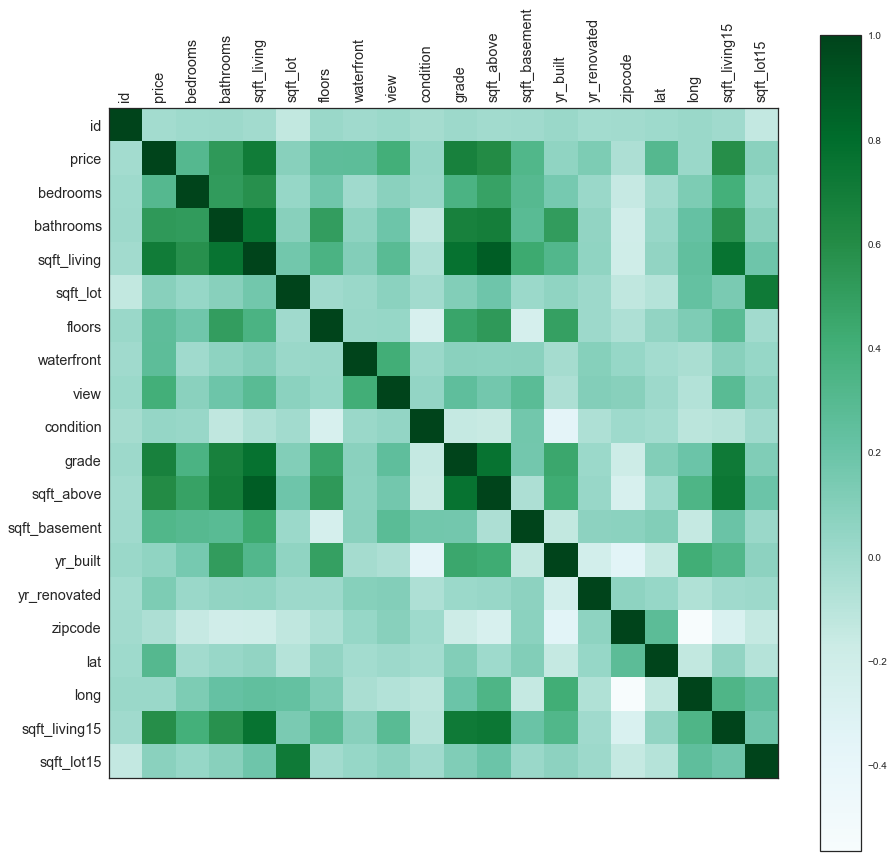

In [5]:
def assess_collinearity(df):
    combinations = []
    collinearity = df.corr()
    columns = collinearity.columns
    for row in collinearity.itertuples(name=None):
        index = row[0]
        corr = row[1:]
        for idx, value in enumerate(corr):
            if value > .75 and index != columns[idx] and \
                    [columns[idx], index, value] not in combinations:
                combinations.append([
                    index,
                    columns[idx],
                    value
                ])
    print('Potentially Unsafe Features (High Collinearity):')
    for risk in combinations:
        print("The features {0} and {1} have a correlation rating of {2}".format(*risk))

    fig, ax = plt.subplots(figsize=(15, 15))
    corr_arr = collinearity.values.ravel()
    vmin = corr_arr.min()
    vmax = corr_arr.max()
    cax = ax.matshow(collinearity, vmin=vmin, vmax=vmax, cmap='BuGn')
    fig.colorbar(cax)
    ticks = np.arange(0, len(collinearity), 1)
    plt.xticks(ticks, columns, rotation=90, size='large')
    plt.yticks(ticks, columns, size='large')
    ax.grid(False)
    plt.show()
assess_collinearity(df)

### Initial Impressions

Looks like we'll need to watch out for high correlations between `sqft_living` and `sqft_above`. Additionally, we learned that our data is in an excellent format for the most part, although the feature `yr_renovated` is almost entirely empty, and could probably be best combined with another.

---

## Visualize the patterns
Now that we have a sense of what the dataset is like, let's visualize how the house price is dependent on various features, and what trends we may see. Eezzy provides functionality for easy plotting.

In [6]:
from tbs.plotting.tbs_plotly_plot import plot_time_series
plot_time_series(df[:1000], 'date', 'price', False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


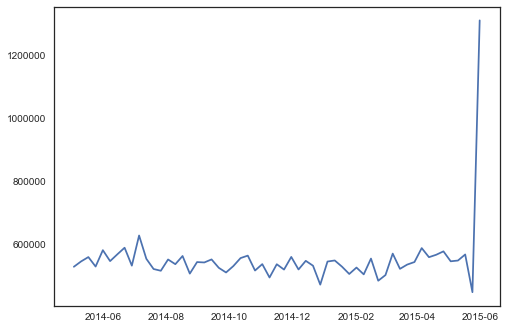

In [7]:
df['date'] = pd.to_datetime(df['date'])

weekly_mean_df = df.resample('W', on='date').mean()
weeks, weekly_means = weekly_mean_df.index, weekly_mean_df['price']
plt.plot(weeks, weekly_means)

In [8]:
df[df['date'] > '2015/05/15']['price']

13053     445500.0
16594    1310000.0
Name: price, dtype: float64

So even though the mean price appears to take off towards the end of the timespan of the dataset, it's only because of an outlier at the very end, and the fact that there are only two houses sold in the final week of the data. So the time of the year a house is sold doesn't appear to have a direct impact on the price the house was sold for.

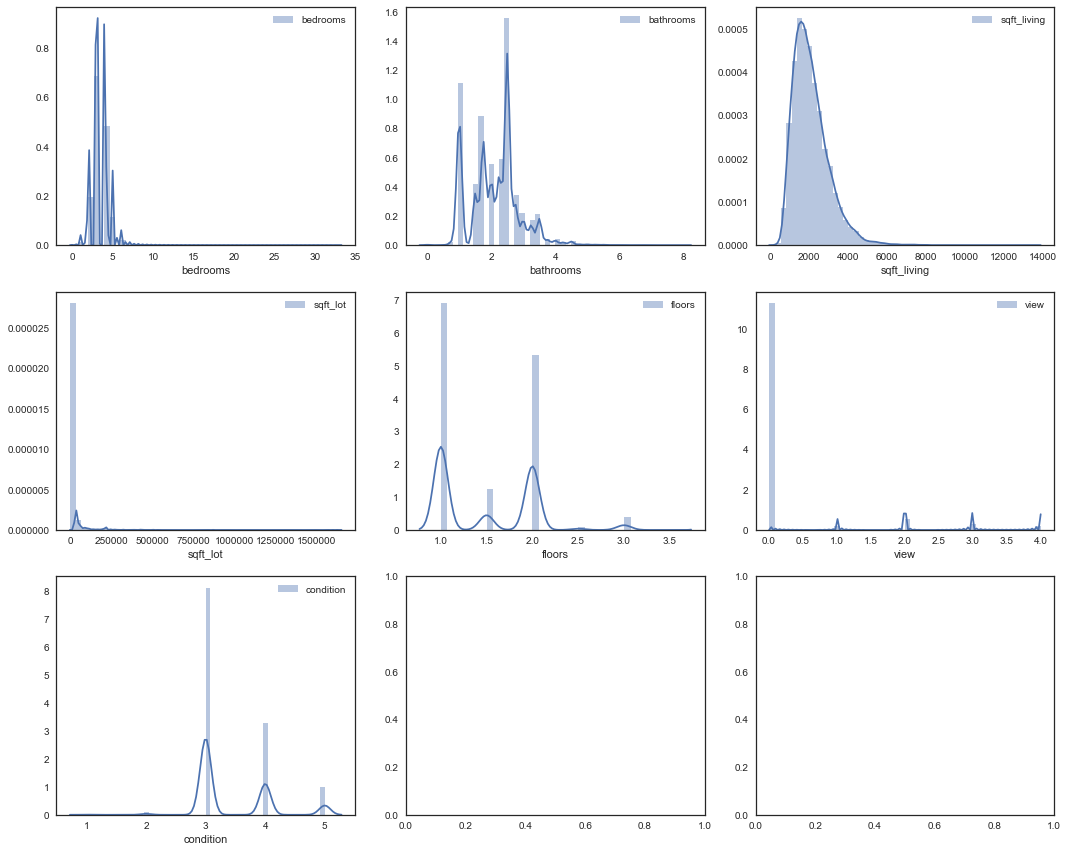

In [9]:
import tbs.plotting.tbs_plot as viz
continuous_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition']
reload(viz)
viz.continuous_plots(df, continuous_columns, num_columns=3, figsize=(15, 12))

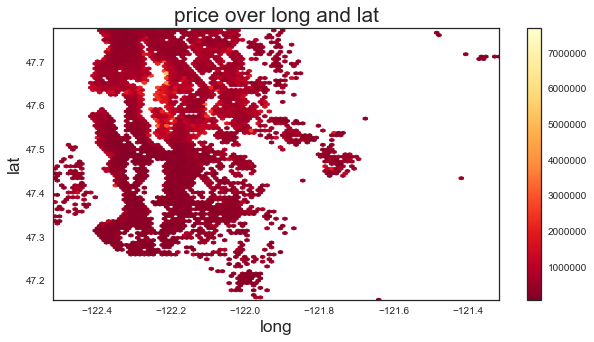

In [10]:
## create a heatmap with longitude and latitude
def heat(df, feature_names):
    X, Y, V = tuple(df[name].values for name in feature_names)

    xmin = X.min()
    xmax = X.max()
    ymin = Y.min()
    ymax = Y.max()
    vmin = V.min()
    vmax = V.max()

    plt.figure(figsize=(10, 5))
    plt.subplots_adjust(hspace=0.5)
    plt.hexbin(X, Y, C=V, vmin=vmin, vmax=vmax, cmap=plt.cm.YlOrRd_r)

    plt.colorbar()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title('{2} over {0} and {1}'.format(*feature_names), size='xx-large')
    plt.xlabel(feature_names[0], size='x-large')
    plt.ylabel(feature_names[1], size='x-large')

    plt.show()
heat(df, ('long', 'lat', 'price'))

### Plotting Averages
`plot_mean_over_x` will display the mean y value (in this case price) over x, which can also be a categorical feature.

In [11]:
def _averages(X, y, slices):
    x_axis, dist, averages, stderrs = tuple(np.ones(slices.shape) for _ in range(4))
    for i, left_index in enumerate(slices):
        left_index = slices[i]
        if i + 1 == len(slices):
            right_index = -1
        else:
            right_index = slices[i + 1]
        x_axis[i] = X[left_index:right_index].mean()
        dist[i] = X[left_index: right_index].shape[0]
        averages[i] = y[left_index:right_index].mean()
        stderrs[i] = y[left_index:right_index].std()
    return x_axis, dist, averages, stderrs

def plot_running_mean(df, x_name, y_name, groups=20):
    from matplotlib.patches import Patch
    
    g = sns.JointGrid(x=x_name, y=y_name, data=df)
    X, y = df[x_name].values, df[y_name].values
    
    uniques = np.unique(X)
    indices = np.argsort(X)
    X = X[indices]
    y = y[indices]
    
    step = len(X) // groups    
    slices = np.arange(0, len(X), step)
    x_axis, dist, averages, stderrs = _averages(X, y, slices) 
    
    def joint(*args):
        plt.plot(x_axis, averages)
        
    def marginal(*args, **kwargs):
        plt.plot(x_axis, stderrs, color='#d16e6e')

    joint_legend = Patch(color='C0', label=y_name)
    ax_legend = Patch(color='#d16e6e', label='stderr')
    
    g.plot_joint(joint)
    g.plot_marginals(marginal)
    g.ax_marg_y.clear()
    g.ax_marg_y.set_axis_off()

    g.ax_joint.set_ylim(min(averages), max(averages))
    plt.legend(handles=[joint_legend, ax_legend])
    plt.suptitle('{0} over {1}'.format(x_name, y_name))
    plt.show()

In [12]:
def plot_category_mean(df, x_name, y_name, error=True):
    X, y = df[x_name].values, df[y_name].values
    uniques = set(X)
    averages = [y[X == unique].mean() for unique in uniques]
    stderrs = [y[X == unique].std() for unique in uniques]
    x_axis = np.arange(len(uniques))
    if error:
        plt.bar(x_axis, averages, yerr=stderrs)
    else:
        plt.bar(x_axis, averages)
    plt.xticks(x_axis, uniques, multialignment='center')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.suptitle('{0} over {1}'.format(x_name, y_name))
    plt.show()

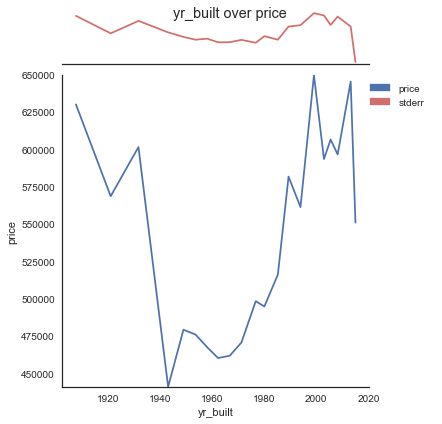

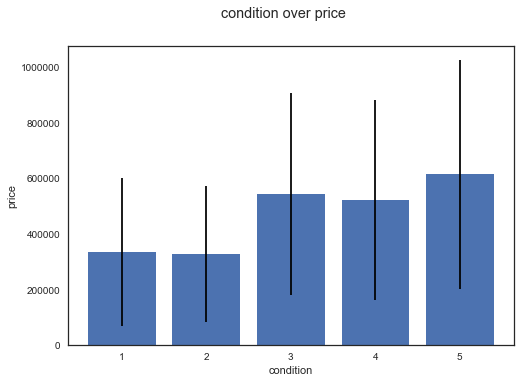

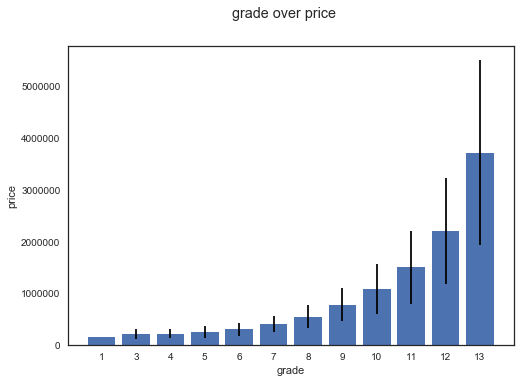

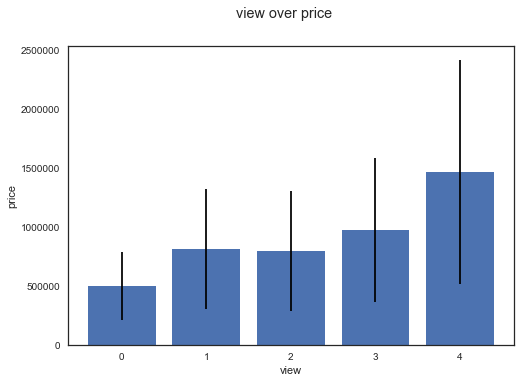

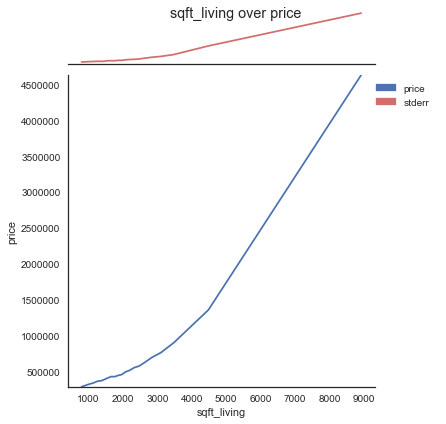

In [13]:
plot_running_mean(df, 'yr_built', 'price')
plot_category_mean(df, 'condition', 'price')
plot_category_mean(df, 'grade', 'price')
plot_category_mean(df, 'view', 'price')
plot_running_mean(df, 'sqft_living', 'price')

_Looks like the 1940s was a rough time to have a house_

_Grade has an excellent fit to average price, as does square feet of living_

## Slimming Down the Number of Features
### The Curse of Dimensionality
Our dataset has several features that are rather redundant or display no correlation with price. In order to improve the accuracy of the model, we'll remove or alter these features that could otherwise distract the model and cause it to underperform.

In [14]:
# First off, we don't need separate features for year built and year renovated
# especially considering most houses haven't been renovated, meaning that
# the renovated year feature is largely useless. So instead, we'll combine the two

years_built = df['yr_built'].values
years_ren = df['yr_renovated'].values
def update_years(built, ren):
    return built if built > ren else ren
update_years = np.vectorize(update_years)

new_feature = update_years(years_built, years_ren)


In [15]:
# Next we'll remove data points that aren't relevant for predicting the price
train_df = df.drop([
        'id',
        'date',
        'yr_renovated',
        'view', # no good explanation for what this feature actually is
        'condition', # grade offers a better insight than this does
        'zipcode', # we already have longitude, latitude, and near-15 for geographic data
        'sqft_above'
    ], axis=1)
# and finally, add in the newly composed feature
train_df['yr_built'] = new_feature
train_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,7,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,7,400,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,6,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,7,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,8,0,1987,47.6168,-122.045,1800,7503


In [16]:
from sklearn.preprocessing import StandardScaler
names = train_df.columns
scaler = StandardScaler()
scaled_train_df = train_df.copy()
for name in names:
    if name != 'price':
        scaled_train_df[name] = scaler.fit_transform(scaled_train_df[name].values.reshape(-1, 1))
scaled_train_df.head()

/Users/chase/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.558836,-0.658681,-0.638266,-0.352572,-0.306079,-0.943355,-0.260715
1,538000.0,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.558836,0.245141,0.611465,1.161568,-0.746341,-0.432686,-0.187868
2,180000.0,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-1.409587,-0.658681,-1.401991,1.283537,-0.135655,1.070140,-0.172375
3,604000.0,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.558836,1.397515,-0.291119,-0.283288,-1.271816,-0.914174,-0.284522
4,510000.0,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,0.291916,-0.658681,0.472606,0.409550,1.199335,-0.272190,-0.192849


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
grade            21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(9)
memory usage: 2.3 MB


_That's a lot better - now the data is completely prepped and ready to be trained upon_

## Quickly Identifying Well-Performing Models
Eezzy has the convinent method `eezzy_ml` that will take your dataset, assume what sort of problem it is (in this case regression), and score various models with various metrics.

In [18]:
from tbs.machine_learning import eezzy_ml
exclusions = [
    'AdaBoostRegressor',
    'BaggingRegressor',
    'ExtraTreesRegressor',
    'GradientBoostingRegressor',
    'RandomForestRegressor',
    'GaussianProcessRegressor',
    'KernelRidge',
    'HuberRegressor',
    'SGDRegressor',
    'RadiusNeighborsRegressor',
    'LinearSVR'
]
eezzy_ml(scaled_train_df, y='price', excluded=exclusions, reduce=200)

200
Optimizing Lars
Optimizing LinearRegression
Optimizing PassiveAggressiveRegressor
Optimizing Ridge
Optimizing KNeighborsRegressor
Optimizing SVR
Optimizing DecisionTreeRegressor

Lars (1 / 7)
Optimable hyperparameters: {'n_nonzero_coefs': 10}
Mean fit time: 0.00s +/- 0.00s

Explained Variance Score: 0.670861947483
Mean Absolute Error: 131628.867773
Mean Squared Error: 44360714888.8
Median Absolute Error: 92292.3297544
R^2 Score: 0.670856324003
------------------

LinearRegression (2 / 7)
Optimable hyperparameters: {}
Mean fit time: 0.00s +/- 0.00s

Explained Variance Score: 0.671199993778
Mean Absolute Error: 132605.717887
Mean Squared Error: 44315364557.1
Median Absolute Error: 93377.4386894
R^2 Score: 0.671192810349
------------------

PassiveAggressiveRegressor (3 / 7)
Optimable hyperparameters: {'epsilon': 0.1, 'C': 0.1, 'loss': 'squared_epsilon_insensitive'}
Mean fit time: 0.00s +/- 0.00s

Explained Variance Score: 0.483949951006
Mean Absolute Error: 179122.994829
Mean Squared

## Selecting a Model and Refining Results
---
Looks like decision trees and k-nearest neighbors fit the data the best. We'll import the model `DecisionTreeRegressor`, as it performed considerably better than others in the brief spotchecking and it provides an easy way of checking out feature importances. 

In order to get optimal results from the Decision Tree model, we'll try to create interaction variables in order to pull out any additional meaning from the data. We'll train it on all of the possible interaction variable features, and select the "most important" ones out of that

In [19]:
from tbs.feature_engineering.tbs_transform import create_interactions
interactions_df = create_interactions(train_df.drop(['price', 'bathrooms'], axis=1))

for name in interactions_df.columns:
    if np.any(np.isinf(interactions_df[name])):
        interactions_df = interactions_df.drop(name, axis=1)

for name in interactions_df.columns:
    result = scaler.fit_transform(interactions_df[name].values.reshape(-1, 1))
    interactions_df[name] = result
interactions_df.head()

/Users/chase/Documents/Coding/three_blades/notebook-templates/python/house_prices/tbs/feature_engineering/tbs_transform.py:407: RuntimeWarning:

divide by zero encountered in log10

/Users/chase/Documents/Coding/three_blades/notebook-templates/python/house_prices/tbs/feature_engineering/tbs_transform.py:408: RuntimeWarning:

divide by zero encountered in log2

/Users/chase/Documents/Coding/three_blades/notebook-templates/python/house_prices/tbs/feature_engineering/tbs_transform.py:407: RuntimeWarning:

invalid value encountered in log10

/Users/chase/Documents/Coding/three_blades/notebook-templates/python/house_prices/tbs/feature_engineering/tbs_transform.py:408: RuntimeWarning:

invalid value encountered in log2

/Users/chase/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



,bedrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,lat,long,...,yr_built_x_lat,yr_built_x_long,yr_built_x_sqft_living15,yr_built_x_sqft_lot15,lat_x_long,lat_x_sqft_living15,lat_x_sqft_lot15,long_x_sqft_living15,long_x_sqft_lot15,sqft_living15_x_sqft_lot15
0,-0.398737,-0.979835,-0.228321,-0.915427,-0.087173,-0.558836,-0.658681,-0.638266,-0.352572,-0.306079,...,-0.712313,0.631010,-0.949188,-0.261872,0.206212,-0.944831,-0.261047,0.943627,0.260770,-0.301352
1,-0.398737,0.533634,-0.189885,0.936506,-0.087173,-0.558836,0.245141,0.611465,1.161568,-0.746341,...,0.851412,-0.690071,-0.408055,-0.185126,-1.296732,-0.424181,-0.186935,0.430795,0.187636,-0.225541
2,-1.473959,-1.426254,-0.123298,-0.915427,-0.087173,-1.409587,-0.658681,-1.401991,1.283537,-0.135655,...,-1.158358,1.429857,0.966745,-0.178221,-1.189651,1.084064,-0.171263,-1.072677,0.172314,-0.097477
3,0.676485,-0.130550,-0.244014,-0.915427,-0.087173,-0.558836,1.397515,-0.291119,-0.283288,-1.271816,...,-0.349342,0.196028,-0.910914,-0.284374,-0.194974,-0.915301,-0.284826,0.912183,0.284419,-0.312300
4,-0.398737,-0.435422,-0.169653,-0.915427,-0.087173,0.291916,-0.658681,0.472606,0.409550,1.199335,...,0.559016,-0.388256,-0.254224,-0.190670,0.058294,-0.269007,-0.192543,0.275828,0.193247,-0.217085


Feature:  grade
Importance 0.19566866267
Feature:  lat_log10
Importance 0.132658405449
Feature:  sqft_living_x_sqft_living15
Importance 0.118861222078
Feature:  sqft_living_x_lat
Importance 0.0417000235526
Feature:  long_cubed
Importance 0.036693015396
Feature:  sqft_living_x_long
Importance 0.0329908118466
Feature:  lat_squared
Importance 0.0329602986898
Feature:  lat_x_long
Importance 0.0322816975807
Feature:  lat
Importance 0.0309552462661
Feature:  long
Importance 0.0237617604907
Feature:  lat_log2
Importance 0.0230598650087
Feature:  long_squared
Importance 0.0175453177734
Feature:  lat_cubed
Importance 0.0168113958567
Feature:  sqft_living_x_sqft_lot
Importance 0.016278723955
Feature:  waterfront
Importance 0.0148793092947
Feature:  sqft_living_x_sqft_lot15
Importance 0.0146681623842
Feature:  yr_built_x_lat
Importance 0.0140308606769
Feature:  sqft_living_x_yr_built
Importance 0.0139835616254
Feature:  yr_built_x_long
Importance 0.0112924349993
Feature:  sqft_lot_x_sqft_living15

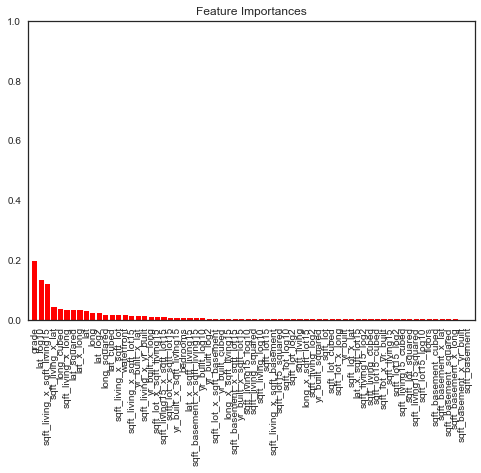

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from tbs.plotting.classification_plot import feature_importances

best_params = {'criterion': 'mae', 'min_impurity_split': 1e-07}
tree = DecisionTreeRegressor(**best_params)
tree.fit(interactions_df.values, df['price'].values)
feature_importances(interactions_df, tree)

Now we'll pull out the more important features and then compare the `scaled_train_df`, which has our normal data, and `interactions_df`, which has the interaction variables.

In [21]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
indices = indices[importances > 0.01]
names = interactions_df.columns[indices]
interactions_df[names].head()

,long_cubed,sqft_living_x_long,lat,long,yr_built_log10,yr_built_log2,sqft_lot_x_sqft_basement,yr_built_cubed,long_x_sqft_living15,sqft_basement_x_sqft_lot15,sqft_lot_log2,long_x_sqft_lot15,sqft_living_log2,yr_built_squared,sqft_lot,sqft_lot_cubed,sqft_lot_squared,sqft_living15_squared,sqft_basement_cubed
0,-0.305345,0.979887,-0.352572,-0.306079,-0.631222,-0.631222,-0.175716,-0.651997,0.943627,-0.188147,-0.388457,0.260770,-1.123042,-0.645192,-0.228321,-0.026982,-0.063645,-0.788562,-0.231521
1,-0.746590,-0.536746,1.161568,-0.746341,0.613472,0.613472,-0.067046,0.607131,0.430795,-0.041894,-0.113368,0.187636,0.709342,0.609351,-0.189885,-0.026977,-0.062962,-0.469439,-0.187002
2,-0.134661,1.426985,1.283537,-0.135655,-1.403203,-1.403203,-0.175716,-1.398998,-1.072677,-0.188147,0.244219,0.172314,-2.127944,-1.400588,-0.123298,-0.026960,-0.061379,0.897415,-0.231521
3,-1.273824,0.127247,-0.283288,-1.271816,-0.283189,-0.283189,-0.005028,-0.306842,0.912183,0.029634,-0.523893,0.284419,0.071481,-0.299004,-0.244014,-0.026983,-0.063876,-0.772312,0.292670
4,1.200050,0.438022,0.409550,1.199335,0.476289,0.476289,-0.175716,0.464954,0.275828,-0.188147,0.007969,0.193247,-0.291399,0.468827,-0.169653,-0.026973,-0.062535,-0.353917,-0.231521


### Decision Tree

In [22]:
from sklearn.metrics import r2_score
pred_y = cross_val_predict(tree, interactions_df.values, train_df['price'].values)
r2_score(train_df['price'].values, pred_y)

0.73181798533880027

In [28]:
pred_y = cross_val_predict(tree, scaled_train_df.drop(['price'], axis=1).values, train_df['price'].values)
r2_score(train_df['price'].values, pred_y)

0.7229607018018871

### K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsRegressor
best_params = {'p': 1, 'leaf_size': 15, 'algorithm': 'ball_tree', 'n_neighbors': 5}
neighbors = KNeighborsRegressor(**best_params)

pred_y = cross_val_predict(neighbors, interactions_df.values, train_df['price'].values)
r2_score(train_df['price'].values, pred_y)

0.78897101965308924

In [27]:
pred_y = cross_val_predict(neighbors, scaled_train_df.drop(['price'], axis=1).values, train_df['price'].values)
r2_score(train_df['price'].values, pred_y)

0.80189122180350436